In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

# Cell types

In [261]:
lm22 = pd.read_csv('../summary_data/cell_types/CombinedLM22.tsv', sep = '\t')
lm22.head()

,accession,geo,use,survivor,age,sex,score_type,severity_score,B_cells,B_cells_naive,...,Macrophages,Macrophages_M0,Macrophages_M1,Macrophages_M2,Dendritic_cells_resting,Dendritic_cells_activated,Mast_cells_resting,Mast_cells_activated,Eosinophils,Neutrophils
0,E-MEXP-3567,X104,discovery,0,NaN,0.0,NaN,NaN,0.13104,0.06322,...,0.10335,0.09282,0.0,0.01053,0.0,0.0,0.0,0.0,0.0,0.31637
1,E-MEXP-3567,X105,discovery,0,NaN,0.0,NaN,NaN,0.15410,0.08319,...,0.25630,0.25630,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.24822
2,E-MEXP-3567,X109,discovery,0,NaN,1.0,NaN,NaN,0.13124,0.08426,...,0.21885,0.21885,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.24536
3,E-MEXP-3567,X115,discovery,1,NaN,0.0,NaN,NaN,0.15521,0.06117,...,0.11886,0.11886,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.32486
4,E-MEXP-3567,X121,discovery,1,NaN,1.0,NaN,NaN,0.07203,0.05966,...,0.27913,0.27913,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.31262


In [262]:
variable = ['T_cells', 'Macrophages','B_cells','Plasma_cells','NK_cells','Monocytes','Macrophages',
            'Mast_cells_resting','Mast_cells_activated','Eosinophils','Neutrophils']

In [263]:
X_train = lm22[lm22.use=="discovery"][variable]
X_test = lm22[lm22.accession=="E-MEXP-3567"][variable]
y_train = lm22[lm22.use=="discovery"]["survivor"]
y_test = lm22[lm22.accession=="E-MEXP-3567"]["survivor"]


In [264]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [265]:
from sklearn.metrics import f1_score
metrics.f1_score(y_test, y_pred, labels=np.unique(y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12



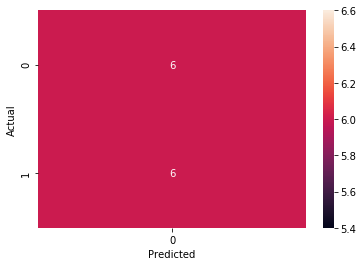

In [266]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

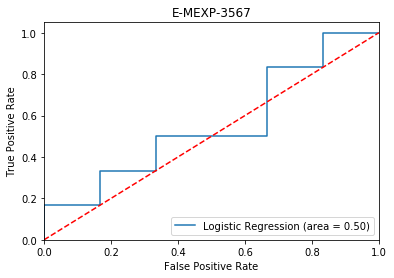

In [267]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('E-MEXP-3567')
plt.legend(loc="lower right")
#plt.savefig('../figures/log_roc_EMEXP3567')
plt.show()

In [268]:
X_train = lm22[lm22.use=="discovery"][variable]
X_test = lm22[lm22.accession=="E-MTAB-4421"][variable]
y_train = lm22[lm22.use=="discovery"]["survivor"]
y_test = lm22[lm22.accession=="E-MTAB-4421"]["survivor"]


In [269]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [270]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        13
           1       0.00      0.00      0.00         6

    accuracy                           0.68        19
   macro avg       0.34      0.50      0.41        19
weighted avg       0.47      0.68      0.56        19



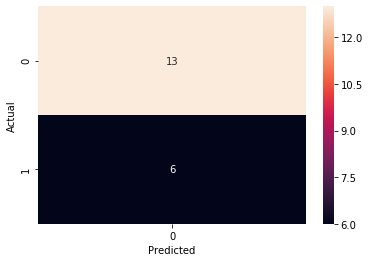

In [271]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

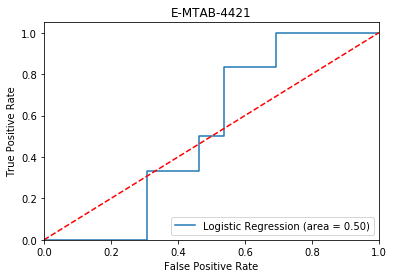

In [272]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('E-MTAB-4421')
plt.legend(loc="lower right")
#plt.savefig('../figures/log_roc_EMEXP3567')
plt.show()

In [273]:
X_test = lm22[lm22.accession=="GSE10474"][variable]
X_train = lm22[lm22.use=="discovery"][variable]
y_test = lm22[lm22.accession=="GSE10474"]["survivor"]
y_train = lm22[lm22.use=="discovery"]["survivor"]


In [274]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [275]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        22
           1       0.00      0.00      0.00        11

    accuracy                           0.67        33
   macro avg       0.33      0.50      0.40        33
weighted avg       0.44      0.67      0.53        33



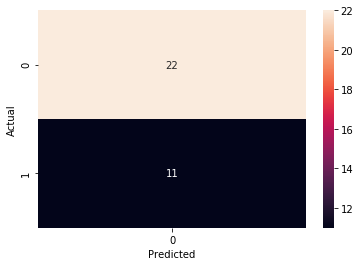

In [276]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

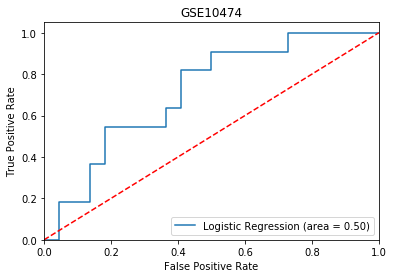

In [277]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE10474')
plt.legend(loc="lower right")
#plt.savefig('../figures/log_roc_EMEXP3567')
plt.show()

In [100]:
X_test = lm22[lm22.accession=="GSE21802"][variable]
X_train = lm22[lm22.use=="discovery"][variable]
y_test = lm22[lm22.accession=="GSE21802"]["survivor"]
y_train = lm22[lm22.use=="discovery"]["survivor"]


In [101]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       0.00      0.00      0.00         4

    accuracy                           0.64        11
   macro avg       0.32      0.50      0.39        11
weighted avg       0.40      0.64      0.49        11



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


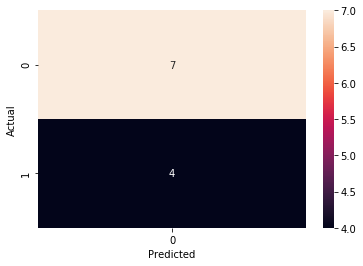

In [103]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

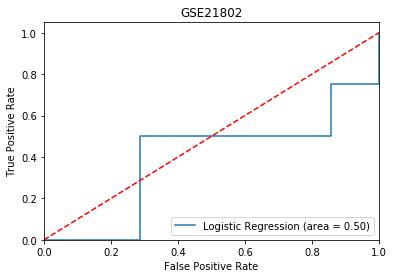

In [104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE21802')
plt.legend(loc="lower right")
#plt.savefig('../figures/log_roc_EMEXP3567')
plt.show()

In [105]:
X_test = lm22[lm22.accession=="GSE27131"][variable]
X_train = lm22[lm22.use=="discovery"][variable]
y_test = lm22[lm22.accession=="GSE27131"]["survivor"]
y_train = lm22[lm22.use=="discovery"]["survivor"]


In [106]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.00      0.00      0.00         4

    accuracy                           0.71        14
   macro avg       0.36      0.50      0.42        14
weighted avg       0.51      0.71      0.60        14



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


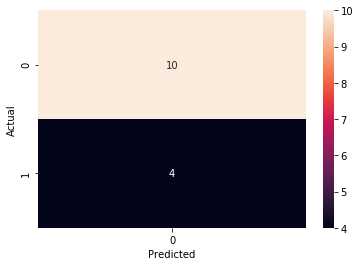

In [108]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

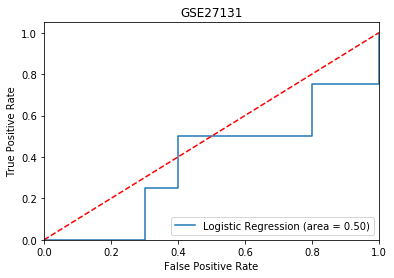

In [109]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE27131')
plt.legend(loc="lower right")
#plt.savefig('../figures/log_roc_EMEXP3567')
plt.show()

In [110]:
X_test = lm22[lm22.accession=="GSE32707"][variable]
X_train = lm22[lm22.use=="discovery"][variable]
y_test = lm22[lm22.accession=="GSE32707"]["survivor"]
y_train = lm22[lm22.use=="discovery"]["survivor"]


In [123]:
logistic_regression= LogisticRegression(penalty='l2',solver='saga')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.78        31
           1       0.00      0.00      0.00        17

    accuracy                           0.65        48
   macro avg       0.32      0.50      0.39        48
weighted avg       0.42      0.65      0.51        48



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


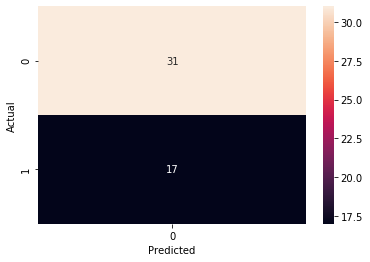

In [125]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

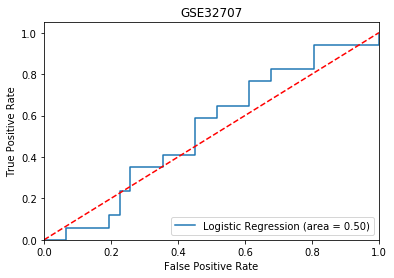

In [126]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE32707')
plt.legend(loc="lower right")
#plt.savefig('../figures/log_roc_EMEXP3567')
plt.show()

In [127]:
X_test = lm22[lm22.accession=="GSE33341"][variable]
X_train = lm22[lm22.use=="discovery"][variable]
y_test = lm22[lm22.accession=="GSE33341"]["survivor"]
y_train = lm22[lm22.use=="discovery"]["survivor"]


In [128]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       0.00      0.00      0.00         2

    accuracy                           0.96        51
   macro avg       0.48      0.50      0.49        51
weighted avg       0.92      0.96      0.94        51



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


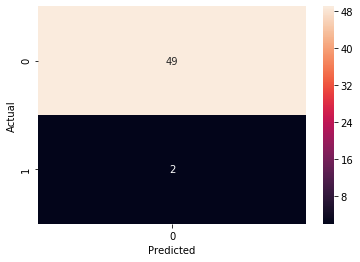

In [130]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

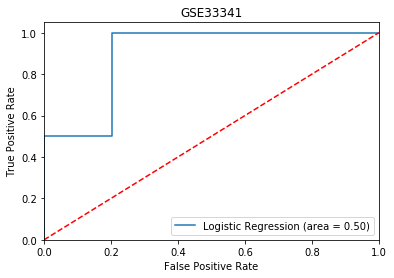

In [131]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE33341')
plt.legend(loc="lower right")
#plt.savefig('../figures/log_roc_EMEXP3567')
plt.show()

In [132]:
X_test = lm22[lm22.accession=="GSE40586"][variable]
X_train = lm22[lm22.use=="discovery"][variable]
y_test = lm22[lm22.accession=="GSE40586"]["survivor"]
y_train = lm22[lm22.use=="discovery"]["survivor"]


In [133]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.00      0.00      0.00         2

    accuracy                           0.90        21
   macro avg       0.45      0.50      0.48        21
weighted avg       0.82      0.90      0.86        21



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


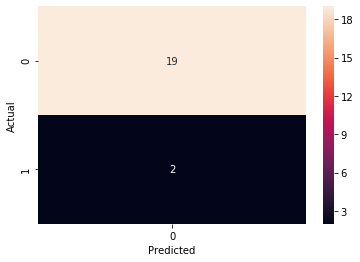

In [135]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

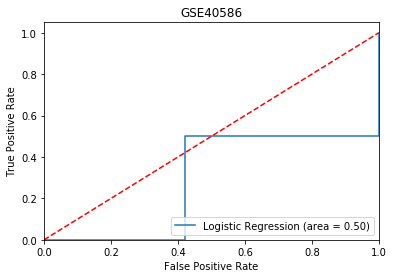

In [136]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE40586')
plt.legend(loc="lower right")
#plt.savefig('../figures/log_roc_EMEXP3567')
plt.show()

In [137]:
X_test = lm22[lm22.accession=="GSE54514"][variable]
X_train = lm22[lm22.use=="discovery"][variable]
y_test = lm22[lm22.accession=="GSE54514"]["survivor"]
y_train = lm22[lm22.use=="discovery"]["survivor"]


In [138]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        96
           1       0.00      0.00      0.00        31

    accuracy                           0.76       127
   macro avg       0.38      0.50      0.43       127
weighted avg       0.57      0.76      0.65       127



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


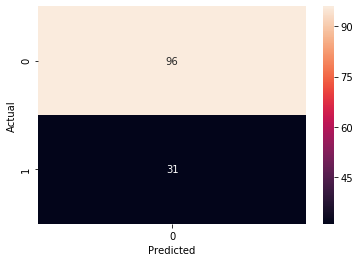

In [140]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

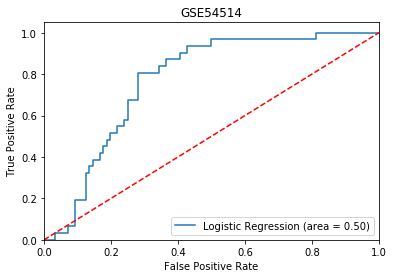

In [141]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE54514')
plt.legend(loc="lower right")
#plt.savefig('../figures/log_roc_EMEXP3567')
plt.show()

In [142]:
X_test = lm22[lm22.accession=="GSE63042"][variable]
X_train = lm22[lm22.use=="discovery"][variable]
y_test = lm22[lm22.accession=="GSE63042"]["survivor"]
y_train = lm22[lm22.use=="discovery"]["survivor"]


In [143]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       100
           1       0.00      0.00      0.00        28

    accuracy                           0.78       128
   macro avg       0.39      0.50      0.44       128
weighted avg       0.61      0.78      0.69       128



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


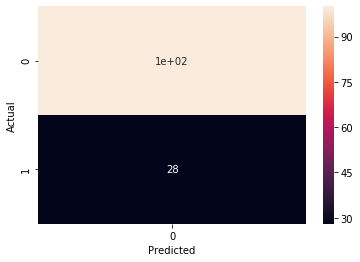

In [145]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

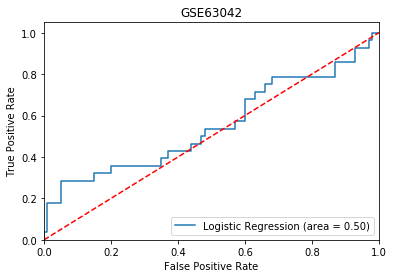

In [146]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE63042')
plt.legend(loc="lower right")
#plt.savefig('../figures/log_roc_EMEXP3567')
plt.show()

In [147]:
X_test = lm22[lm22.accession=="GSE63990"][variable]
X_train = lm22[lm22.use=="discovery"][variable]
y_test = lm22[lm22.accession=="GSE63990"]["survivor"]
y_train = lm22[lm22.use=="discovery"]["survivor"]


In [148]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        64
           1       0.00      0.00      0.00         6

    accuracy                           0.91        70
   macro avg       0.46      0.50      0.48        70
weighted avg       0.84      0.91      0.87        70



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


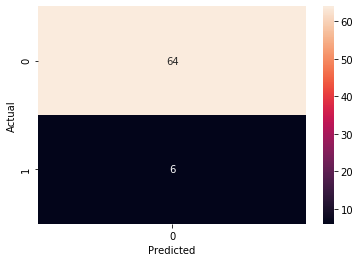

In [150]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

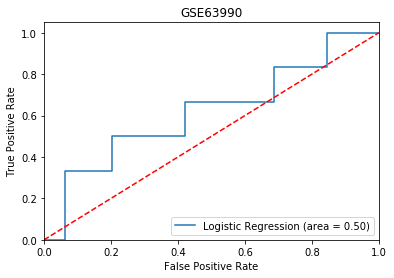

In [151]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE63990')
plt.legend(loc="lower right")
#plt.savefig('../figures/log_roc_EMEXP3567')
plt.show()

In [152]:
X_test = lm22[lm22.accession=="GSE66890"][variable]
X_train = lm22[lm22.use=="discovery"][variable]
y_test = lm22[lm22.accession=="GSE66890"]["survivor"]
y_train = lm22[lm22.use=="discovery"]["survivor"]


In [153]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        43
           1       0.00      0.00      0.00        14

    accuracy                           0.75        57
   macro avg       0.38      0.50      0.43        57
weighted avg       0.57      0.75      0.65        57



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


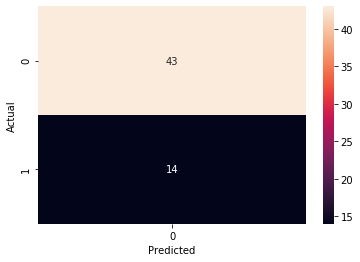

In [155]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

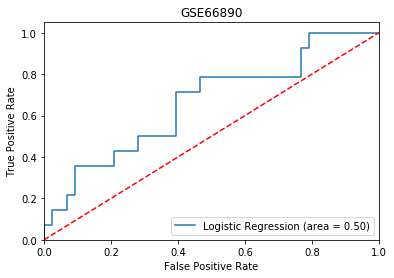

In [156]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE66890')
plt.legend(loc="lower right")
#plt.savefig('../figures/log_roc_EMEXP3567')
plt.show()

# random split (gene)

In [65]:
gse63042 = pd.read_csv('../summary_data/expression_data/symb_gse63042.tsv', sep = '\t', encoding="ISO-8859-1")
gse63042.head()

,ID,survivor,DEFA4,CD163,PER1,RGS1,HIF1A,SEPP1,C11orf74,CIT,...,CST3,CBFA2T3,RCBTB2,CX3CR1,CD5,MTMR11,CLEC10A,EMR3,DHRS7B,CEACAM8
0,d25,0,3.440555,113.225523,130.115518,none,20.643327,0.000000,none,none,...,887.037523,65.683314,19.704994,46.291098,16.264440,9.070553,9.696108,67.247203,21.581660,5.004443
1,d29,0,0.380961,142.670064,8.762113,none,11.809805,0.000000,none,none,...,156.765637,48.191624,21.714803,9.143075,4.381057,4.000095,2.857211,43.239125,21.714803,1.142884
2,d37,0,5.212292,14.452264,13.978419,none,13.978419,0.000000,none,none,...,638.505759,175.796391,32.932208,97.375090,45.962938,7.581516,1.421534,35.301432,18.479944,2.132301
3,d38,0,2.883359,430.682828,59.640011,none,30.351151,0.303512,none,none,...,679.258752,21.852828,20.638782,16.844889,2.428092,2.883359,3.035115,38.849473,16.996644,7.436032
4,d39,0,106.078034,131.707626,41.054810,none,18.984883,0.474622,none,none,...,997.418293,85.431974,37.020522,43.902542,25.154970,25.629592,24.443037,82.346930,38.681699,10.678997


In [20]:
# X = gse63042[['DEFA4','CD163','PER1','HIF1A','SEPP1','CFD','DDIT4','IFI27','IL1R2',
#                 'MAFF','OCLN','B4GALT4','BPI','CD24','CEP55','CTSG',
#                'G0S2','MPO','MT1G','PAM','PSMA6','TRIB1','CKS2','MKI67','POLD3','PLK1','LY86','TST','KCNJ2','AIM2','APH1A','CCR2','EIF5A',
#                'GSTM1','HIST1H3H','NT5E','RAB40B','VNN3','ABCB4','CTSS','IKZF2','TGFBI','CST3','CBFA2T3','RCBTB2','CX3CR1','CD5','MTMR11','CLEC10A',
#                 'EMR3','DHRS7B','CEACAM8']]
# y = gse63042['survivor']

In [75]:
X = gse63042[["CFD","DDIT4","IFI27","IL1R2",
            "MAFF", "AIM2","APH1A",
            "CCR2","EIF5A","RAB40B","VNN3",
            "GSTM1", "HIST1H3H", "NT5E"]]
y = gse63042['survivor']

In [96]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)


In [97]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        46
           1       0.56      0.28      0.37        18

    accuracy                           0.73        64
   macro avg       0.66      0.60      0.60        64
weighted avg       0.71      0.73      0.70        64



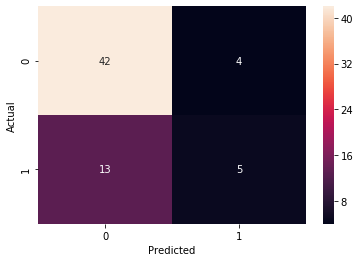

In [99]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

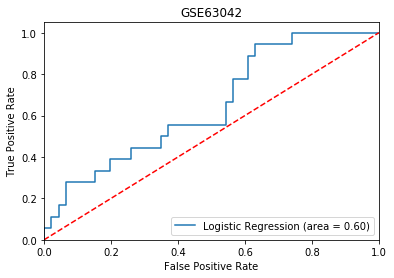

In [101]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE63042')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [214]:
EMEXP3567 = pd.read_csv('../summary_data/expression_data/symb_EMEXP3567.tsv', sep = '\t', encoding="ISO-8859-1")
EMEXP3567.head()

,ID,survivor,DEFA4,CD163,PER1,RGS1,HIF1A,SEPP1,C11orf74,CIT,...,CST3,CBFA2T3,RCBTB2,CX3CR1,CD5,MTMR11,CLEC10A,EMR3,DHRS7B,CEACAM8
0,X104,0,4.224372,7.257031,4.547272,1.521859,6.854448,none,none,3.596326,...,7.351872,4.121609,3.304737,8.082754,4.900840,4.555851,3.188170,none,4.266636,3.231226
1,X105,0,4.696792,6.180262,4.341699,1.306699,7.699910,none,none,3.328116,...,7.172721,4.198201,3.511236,6.972769,4.376221,3.148233,2.906964,none,3.971848,6.152539
2,X109,0,8.121342,5.256019,4.418108,1.587908,6.572749,none,none,3.569161,...,7.027961,4.125534,2.628888,6.957968,4.705877,3.680903,3.567198,none,3.868781,4.093514
3,X115,1,4.446170,7.003478,4.449394,1.710331,7.243289,none,none,3.840483,...,6.158570,4.016140,3.025721,6.576535,4.774287,3.355072,3.583474,none,3.995332,3.396105
4,X121,1,6.204941,8.406683,5.008753,1.674414,6.765696,none,none,3.588359,...,7.392475,3.948515,2.156668,5.695481,4.774287,3.940419,3.336004,none,4.234894,4.817801


In [20]:
# A = EMEXP3567[['DEFA4','CD163','PER1','RGS1','HIF1A','CIT','CFD','DDIT4','IFI27','IL1R2',
#                 'MAFF','B4GALT4','BPI','CD24','CEP55','CTSG',
#                'G0S2','MPO','MT1G','PAM','PSMA6','TRIB1','CKS2','MKI67','POLD3','PLK1',
#                'LY86','TST','KCNJ2','AIM2','APH1A','CCR2','EIF5A',
#                'NT5E','RAB40B','VNN3','ABCB4','CTSS','IKZF2','TGFBI',
#                'CST3','CBFA2T3','RCBTB2','CX3CR1','CD5','MTMR11','CLEC10A',
#                'DHRS7B','CEACAM8']]
# b = EMEXP3567['survivor']

In [215]:
X = EMEXP3567[["CFD","DDIT4","IFI27","IL1R2","MAFF","AIM2","APH1A",
            "CCR2","EIF5A","RAB40B","VNN3","NT5E"]]
y = EMEXP3567['survivor']

In [234]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.6,random_state=0)

In [235]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [236]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.67      0.50      0.57         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8



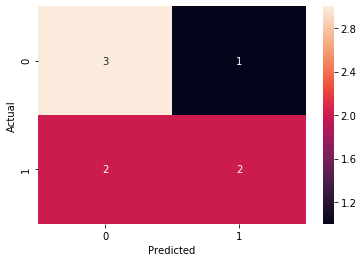

In [237]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

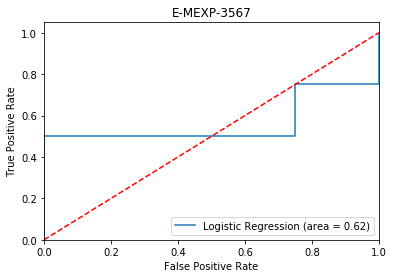

In [238]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('E-MEXP-3567')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [533]:
EMTAB4421 = pd.read_csv('../summary_data/expression_data/symb_EMTAB4421.tsv', sep = '\t', encoding="ISO-8859-1")
EMTAB4421.head()

,ID,survivor,DEFA4,CD163,PER1,RGS1,HIF1A,SEPP1,C11orf74,CIT,...,CST3,CBFA2T3,RCBTB2,CX3CR1,CD5,MTMR11,CLEC10A,EMR3,DHRS7B,CEACAM8
0,6235821067_J,0,10.123246,9.545485,3.067881,4.610776,6.042191,none,6.026362,none,...,13.201424,6.308092,9.502899,10.877067,6.566559,5.175959,4.679194,9.794286,7.280854,8.878061
1,6235821079_I,0,7.627344,9.287743,3.852400,4.806964,6.062683,none,5.234981,none,...,12.376462,5.702663,9.288477,10.734254,6.267389,6.039288,4.765741,10.340234,7.445163,5.527057
2,6235821083_C,1,11.285419,11.673024,2.541070,4.547853,6.859142,none,3.807590,none,...,11.345403,4.789559,9.519918,8.685942,3.712639,5.376552,4.716212,8.133295,7.393958,9.119928
3,6235821083_K,0,9.181854,11.897142,2.517598,4.698197,7.821357,none,5.179039,none,...,10.956098,5.119246,9.370476,5.615600,2.216713,5.360834,5.154358,3.345621,7.144125,8.127687
4,6235821084_G,1,12.834057,10.719649,2.844894,3.665191,7.176142,none,7.160414,none,...,12.247763,4.938643,10.045109,10.216539,2.922932,4.422020,4.862238,5.981004,7.954365,10.651834


In [29]:
# X = EMTAB4421[['DEFA4','CD163','PER1','RGS1','HIF1A','C11orf74','CFD','DDIT4','IFI27','IL1R2',
#                 'IL8','MAFF','B4GALT4','BPI','CD24','CEP55','CTSG',
#                'G0S2','MPO','MT1G','NDUFV2','PAM','PSMA6','TRIB1','CKS2','POLD3',
#                'LY86','TST','KCNJ2','AIM2','APH1A','CCR2','EIF5A',
#                'GSTM1','HIST1H3H','RAB40B','VNN3','ABCB4','CTSS','IKZF2','TGFBI',
#                'CST3','CBFA2T3','RCBTB2','CX3CR1','CD5','MTMR11','CLEC10A',
#                'EMR3','DHRS7B','CEACAM8']]
# y = EMTAB4421['survivor']

In [534]:
X = EMTAB4421[['RGS1','CFD','DDIT4','IFI27','IL1R2','IL8',
                'MAFF','AIM2','APH1A','CCR2','EIF5A',
               'RAB40B','VNN3']]
y = EMTAB4421['survivor']

In [545]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)

In [546]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [547]:
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       0.00      0.00      0.00         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


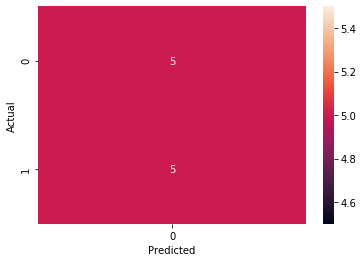

In [548]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

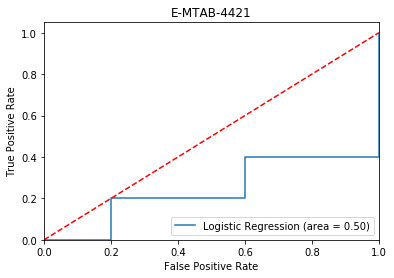

In [549]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('E-MTAB-4421')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [239]:
gse10474 = pd.read_csv('../summary_data/expression_data/symb_gse10474.tsv', sep = '\t', encoding="ISO-8859-1")
gse10474.head()

,ID,survivor,DEFA4,CD163,PER1,RGS1,HIF1A,SEPP1,C11orf74,CIT,...,CST3,CBFA2T3,RCBTB2,CX3CR1,CD5,MTMR11,CLEC10A,EMR3,DHRS7B,CEACAM8
0,GSM264753,0,12.604623,10.579215,8.013437,3.118625,11.742317,none,none,5.095234,...,11.229385,6.884160,10.287113,9.786581,6.222814,6.296982,4.795399,none,8.384489,11.117994
1,GSM264987,1,10.198401,10.334782,6.952189,2.914476,11.636113,none,none,5.121433,...,10.601428,5.277653,9.631636,8.030165,6.091402,6.564410,5.871494,none,7.786628,6.929762
2,GSM264988,1,9.424331,10.154976,7.125557,3.314336,11.349411,none,none,5.323331,...,10.400759,5.750361,10.075861,7.308954,6.186212,5.715589,5.134194,none,7.478407,6.405183
3,GSM264989,0,13.711147,6.922628,6.684205,3.212133,11.175474,none,none,5.848008,...,9.967929,7.057689,9.605611,9.371622,6.032283,5.012741,5.387865,none,7.194903,12.250989
4,GSM264990,0,7.398127,11.728565,7.018028,3.292726,12.258108,none,none,5.551844,...,9.771195,6.600498,9.768775,8.337596,5.688514,5.035603,4.988284,none,8.008368,9.926986


In [41]:
# X = gse10474[['DEFA4','CD163','PER1','RGS1','HIF1A','CIT','CFD','DDIT4','IFI27','IL1R2',
#                 'MAFF','B4GALT4','BPI','CD24','CEP55','CTSG',
#                'G0S2','MPO','MT1G','PAM','PSMA6','TRIB1','CKS2','MKI67','POLD3',
#                'LY86','TST','KCNJ2','AIM2','APH1A','CCR2','EIF5A',
#                'NT5E','RAB40B','VNN3','ABCB4','CTSS','IKZF2','TGFBI',
#                'CST3','CBFA2T3','RCBTB2','CX3CR1','CD5','MTMR11','CLEC10A',
#                'DHRS7B','CEACAM8']]
# y = gse10474['survivor']

In [240]:
X = gse10474[['CFD','DDIT4','IFI27','IL1R2',
                'MAFF','AIM2','APH1A','CCR2','EIF5A',
               'NT5E','RAB40B','VNN3']]
y = gse10474['survivor']

In [271]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [272]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [273]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.25      0.40         4

    accuracy                           0.57         7
   macro avg       0.75      0.62      0.53         7
weighted avg       0.79      0.57      0.51         7



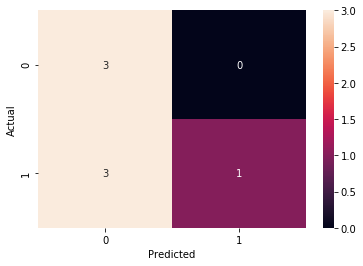

In [274]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

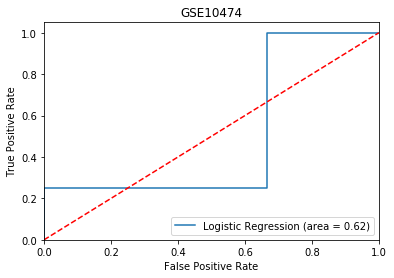

In [275]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE10474')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [320]:
gse21802 = pd.read_csv('../summary_data/expression_data/symb_gse21802.tsv', sep = '\t', encoding="ISO-8859-1")
gse21802.head()

,ID,survivor,DEFA4,CD163,PER1,RGS1,HIF1A,SEPP1,C11orf74,CIT,...,CST3,CBFA2T3,RCBTB2,CX3CR1,CD5,MTMR11,CLEC10A,EMR3,DHRS7B,CEACAM8
0,FCC_Nov.4.09,0,1883.022,262.7168,106.5281,103.2158,228.7931,89.44266,104.23210,167.8620,...,18107.84,968.1348,151.6669,371.5424,687.9445,107.4970,115.6609,404.5415,443.9535,1189.815
1,HUV_6d1,0,1433.995,760.7023,130.2473,100.2634,417.9232,91.13676,80.79919,155.2618,...,18268.82,1171.0160,183.0371,322.4690,435.2427,122.4363,108.6142,741.6639,436.0368,2596.462
2,HUV_7d1,0,3907.885,296.5243,113.7011,104.2612,395.8163,91.78140,132.29540,153.1317,...,11732.37,808.9927,225.3787,414.8038,387.3100,113.2279,107.3068,709.0435,425.4512,6037.856
3,P12_Nov.24.09,1,25414.060,386.1180,190.9653,130.7444,393.7131,136.53080,245.05000,356.0885,...,14471.50,781.9656,388.1040,515.9862,677.8937,168.7760,169.9777,649.9391,564.3397,18955.540
4,DED_Nov.3.09,1,3098.557,7492.3430,211.7313,156.1802,816.1159,141.12660,182.20760,170.2758,...,17260.77,702.0785,460.8876,333.0838,447.3343,136.3508,157.0275,247.9021,971.9445,1613.885


In [ ]:
# X = gse21802[['DEFA4','CD163','PER1','RGS1','HIF1A','SEPP1','C11orf74','CIT','CFD','DDIT4','IFI27','IL1R2',
#                 'IL8','MAFF','OCLN','B4GALT4','BPI','CD24','CEP55','CTSG',
#                'G0S2','MPO','MT1G','NDUFV2','PAM','PSMA6','TRIB1','CKS2','MKI67','POLD3',
#                'PLK1','LY86','TST','OR52R1','KCNJ2','AIM2','APH1A','CCR2','EIF5A',
#                'GSTM1','HIST1H3H','NT5E','RAB40B','VNN3','ABCB4','CTSS','IKZF2','TGFBI',
#                'CST3','CBFA2T3','RCBTB2','CX3CR1','CD5','MTMR11','CLEC10A',
#                'EMR3','DHRS7B','CEACAM8']]
# y = gse21802['survivor']

In [321]:
X = gse21802[['RGS1','CFD','DDIT4','IFI27','IL1R2',
                'IL8','MAFF','OCLN',
               'AIM2','APH1A','CCR2','EIF5A',
               'GSTM1','HIST1H3H','NT5E','RAB40B','VNN3']]
y = gse21802['survivor']

In [322]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.65,random_state=0)

In [323]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [324]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.50      0.67      0.57         3

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8



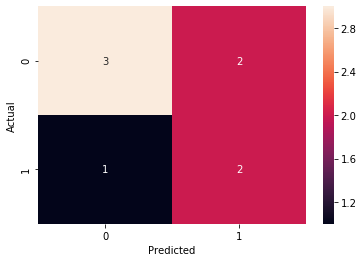

In [325]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

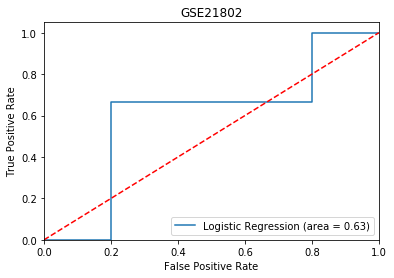

In [326]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE21802')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [525]:
gse27131 = pd.read_csv('../summary_data/expression_data/symb_gse27131.tsv', sep = '\t', encoding="ISO-8859-1")
gse27131.head()

,ID,survivor,DEFA4,CD163,PER1,RGS1,HIF1A,SEPP1,C11orf74,CIT,...,CST3,CBFA2T3,RCBTB2,CX3CR1,CD5,MTMR11,CLEC10A,EMR3,DHRS7B,CEACAM8
0,GSM670449,1,6.902437,8.929694,4.245451,1.644822,9.304211,none,none,4.016693,...,7.418723,5.400574,6.691241,5.375969,5.018819,4.104568,3.264005,none,5.709314,7.010257
1,GSM670450,1,8.435344,6.768682,4.341053,0.994102,9.229726,none,none,4.289649,...,7.670092,5.421657,7.249297,6.241649,5.039338,4.020293,3.209822,none,5.681650,7.374158
2,GSM670451,0,4.022349,5.495349,4.058052,1.036478,8.436787,none,none,3.984876,...,7.539011,5.280027,7.031382,6.993821,6.733992,4.051709,3.509468,none,5.209213,4.421339
3,GSM670452,0,8.271460,6.523742,4.079424,0.971958,8.162145,none,none,3.898608,...,8.231109,5.600024,7.343295,7.064898,5.421792,4.318309,4.363571,none,5.329080,8.618064
4,GSM670453,1,9.926305,5.904554,5.556813,1.340129,8.439327,none,none,4.302731,...,8.317202,5.375245,7.248437,6.734483,5.665788,4.326622,3.472011,none,5.619764,9.357486


In [526]:
# X = gse27131[['DEFA4','CD163','PER1','RGS1','HIF1A','CIT','CFD','DDIT4','IFI27','IL1R2',
#                 'MAFF','OCLN','B4GALT4','BPI','CD24','CEP55','CTSG',
#                'G0S2','MPO','MT1G','NDUFV2','PAM','TRIB1','CKS2','MKI67','POLD3',
#                'LY86','TST','OR52R1','KCNJ2','AIM2','APH1A','CCR2','EIF5A',
#                'GSTM1','NT5E','RAB40B','VNN3','ABCB4','CTSS','IKZF2','TGFBI',
#                'CST3','CBFA2T3','RCBTB2','CX3CR1','CD5','MTMR11','CLEC10A',
#                'DHRS7B','CEACAM8']]
# y = gse27131['survivor']

In [527]:
X = gse27131[['RGS1','CFD','DDIT4','IFI27','IL1R2',
                'MAFF','OCLN','AIM2','APH1A','CCR2','EIF5A',
               'GSTM1','NT5E','RAB40B','VNN3']]
y = gse27131['survivor']

In [528]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)

In [529]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [530]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.00      0.00      0.00         1

    accuracy                           0.43         7
   macro avg       0.38      0.25      0.30         7
weighted avg       0.64      0.43      0.51         7



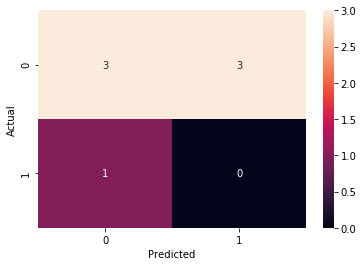

In [531]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

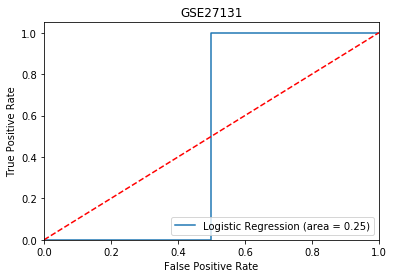

In [532]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE27131')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [334]:
gse32707 = pd.read_csv('../summary_data/expression_data/symb_gse32707.tsv', sep = '\t', encoding="ISO-8859-1")
gse32707.head()

,ID,survivor,DEFA4,CD163,PER1,RGS1,HIF1A,SEPP1,C11orf74,CIT,...,CST3,CBFA2T3,RCBTB2,CX3CR1,CD5,MTMR11,CLEC10A,EMR3,DHRS7B,CEACAM8
0,169833_DO011139837DR_5388500001_A,1,3343.3,254.6,106.4,93.1,240.8,88.6,82.3,68.8,...,2738.7,95.6,163.6,203.3,67.3,90.0,90.6,240.1,151.4,2497.2
1,169889_DO011142247DR_5388500001_C,1,18928.1,386.7,109.6,104.8,300.2,96.4,103.5,73.7,...,6987.8,129.2,320.2,587.3,124.3,110.4,112.0,810.1,286.1,5856.8
2,169890_DO011142265DR_5388500001_E,1,62.2,93.2,65.1,80.2,74.8,89.8,80.3,61.5,...,88.5,80.1,68.3,73.7,62.1,78.6,88.6,65.2,98.5,67.8
3,169772_DO011139486DR_5388500001_K,1,142.9,381.4,77.2,80.2,133.2,80.9,80.9,62.4,...,3438.2,91.1,136.9,118.8,70.9,100.4,84.9,208.4,115.7,303.5
4,169835_DO011139873DR_5388500002_A,0,383.6,186.0,97.3,86.1,308.2,91.6,79.6,61.0,...,5197.9,125.0,545.8,776.6,268.6,122.6,104.1,873.6,209.9,226.2


In [64]:
# X = gse32707[['DEFA4','CD163','PER1','RGS1','HIF1A','SEPP1','C11orf74','CIT','CFD','DDIT4','IFI27','IL1R2',
#                 'IL8','MAFF','OCLN','B4GALT4','BPI','CD24','CEP55','CTSG',
#                'G0S2','MPO','MT1G','NDUFV2','PAM','PSMA6','TRIB1','CKS2','MKI67','POLD3',
#                'PLK1','LY86','TST','OR52R1','KCNJ2','AIM2','APH1A','CCR2','EIF5A',
#                'GSTM1','HIST1H3H','NT5E','RAB40B','VNN3','ABCB4','CTSS','IKZF2','TGFBI',
#                'CST3','CBFA2T3','RCBTB2','CX3CR1','CD5','MTMR11','CLEC10A',
#                'EMR3','DHRS7B','CEACAM8']]
# y = gse32707['survivor']

In [335]:
X = gse32707[['RGS1','CFD','DDIT4','IFI27','IL1R2',
                'IL8','MAFF','OCLN','AIM2','APH1A','CCR2','EIF5A',
               'GSTM1','HIST1H3H','NT5E','RAB40B','VNN3']]
y = gse32707['survivor']

In [362]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [363]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [364]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.50      0.40      0.44         5

    accuracy                           0.67        15
   macro avg       0.61      0.60      0.60        15
weighted avg       0.65      0.67      0.66        15



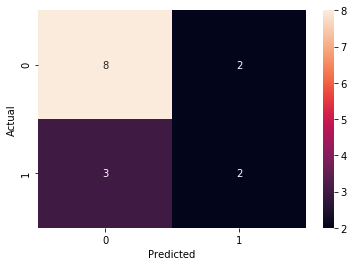

In [365]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

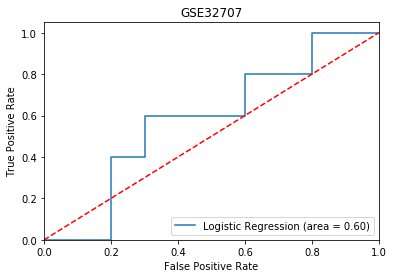

In [366]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE32707')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [518]:
gse33341 = pd.read_csv('../summary_data/expression_data/symb_gse33341.tsv', sep = '\t', encoding="ISO-8859-1")
gse33341.head()

,ID,survivor,DEFA4,CD163,PER1,RGS1,HIF1A,SEPP1,C11orf74,CIT,...,CST3,CBFA2T3,RCBTB2,CX3CR1,CD5,MTMR11,CLEC10A,EMR3,DHRS7B,CEACAM8
0,GSM824707,0,5.806240,10.174355,7.543509,3.864117,11.960349,none,none,5.502786,...,11.667907,7.076452,9.963620,11.570777,6.744905,8.911710,7.660502,none,8.570877,5.485636
1,GSM824708,0,6.530527,9.282385,6.725294,3.617583,11.152233,none,none,5.857309,...,11.767008,8.741773,10.747234,11.876712,7.142452,8.766672,6.239358,none,8.922664,5.806965
2,GSM824709,0,9.885717,8.238515,6.491008,3.983638,11.394591,none,none,5.631957,...,12.278855,8.629278,11.054631,11.984510,7.409666,9.114323,7.056747,none,8.631219,8.026154
3,GSM824710,0,6.972076,10.455699,6.689990,3.560378,11.827276,none,none,5.668257,...,11.890112,8.195607,10.231728,12.340478,6.520819,8.030634,6.997477,none,8.677136,8.785833
4,GSM824711,0,6.398902,9.034647,7.790223,3.530639,8.990211,none,none,5.630873,...,12.749800,9.203986,9.051968,12.020869,8.098636,9.565369,8.510308,none,9.080625,4.913369


In [519]:
X = gse33341[['RGS1','CFD','DDIT4','IFI27','IL1R2',
                'MAFF','AIM2','APH1A','CCR2','EIF5A',
               'NT5E','RAB40B','VNN3']]
y = gse33341['survivor']

In [520]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [521]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [522]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.00      0.00      0.00         1

    accuracy                           0.92        13
   macro avg       0.46      0.50      0.48        13
weighted avg       0.85      0.92      0.89        13



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


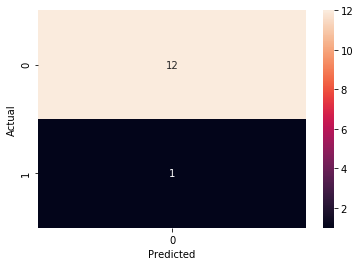

In [523]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

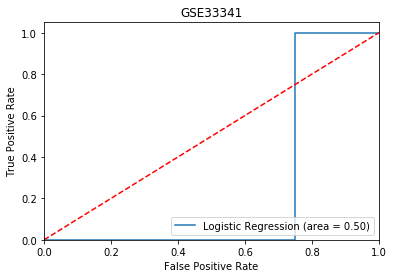

In [524]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE33341')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [489]:
gse40586 = pd.read_csv('../summary_data/expression_data/symb_gse40586.tsv', sep = '\t', encoding="ISO-8859-1")
gse40586.head()

,ID,survivor,DEFA4,CD163,PER1,RGS1,HIF1A,SEPP1,C11orf74,CIT,...,CST3,CBFA2T3,RCBTB2,CX3CR1,CD5,MTMR11,CLEC10A,EMR3,DHRS7B,CEACAM8
0,GSM997332,0,5.723792,11.806308,8.078471,4.125392,11.734304,none,none,6.129793,...,9.696260,7.787764,7.852346,8.057430,7.437712,6.553566,6.326003,none,7.742280,9.034824
1,GSM997335,0,6.312135,12.230945,7.285496,4.406833,10.681284,none,none,5.812896,...,10.272661,7.992882,8.974999,8.742285,7.283994,6.268080,7.037240,none,7.810388,7.352161
2,GSM997336,0,5.767104,12.481289,8.042500,4.866065,11.356658,none,none,6.330320,...,9.530113,7.849507,8.910221,8.755795,7.316398,6.297297,6.130597,none,7.769056,9.655757
3,GSM997339,0,6.183926,11.279517,7.197828,4.793746,10.470181,none,none,5.875209,...,10.638627,7.870429,8.902135,9.804779,7.776491,6.414608,8.023570,none,7.666765,6.909638
4,GSM997340,0,9.825564,11.740720,7.942535,4.658065,10.128500,none,none,6.517839,...,10.479376,8.178578,8.548222,7.646866,7.074736,6.478505,6.416832,none,7.650586,11.137315


In [490]:
X = gse40586[['RGS1','CFD','DDIT4','IFI27','IL1R2',
                'MAFF','OCLN','AIM2','APH1A','CCR2','EIF5A',
               'GSTM1','NT5E','RAB40B','VNN3']]
y = gse40586['survivor']

In [513]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)

In [514]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [515]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.00      0.00      0.00         1

    accuracy                           0.91        11
   macro avg       0.45      0.50      0.48        11
weighted avg       0.83      0.91      0.87        11



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


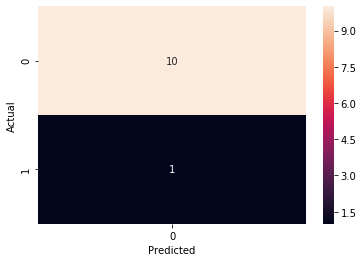

In [516]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

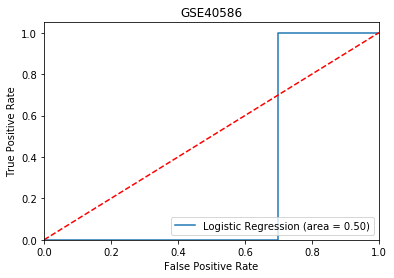

In [517]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE40586')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [386]:
gse54514 = pd.read_csv('../summary_data/expression_data/symb_gse54514.tsv', sep = '\t', encoding="ISO-8859-1")
gse54514.head()

,ID,survivor,DEFA4,CD163,PER1,RGS1,HIF1A,SEPP1,C11orf74,CIT,...,CST3,CBFA2T3,RCBTB2,CX3CR1,CD5,MTMR11,CLEC10A,EMR3,DHRS7B,CEACAM8
0,4481649065_F,0,515.2,993.1,68.4,73.9,338.3,64.1,66.1,60.6,...,2920.8,72.9,274.5,327.4,84.1,81.7,63.5,917.3,112.2,500.3
1,4481649065_G,0,9787.2,219.9,82.7,68.1,579.1,72.8,83.3,56.3,...,3363.6,66.2,449.9,505.6,112.2,89.1,64.1,752.1,135.0,4755.9
2,4481649065_H,0,12085.3,658.9,83.7,75.5,715.5,84.6,87.4,57.8,...,5333.1,83.7,707.9,1827.0,196.5,94.4,84.1,1098.6,221.0,5049.6
3,4481649065_I,0,8872.2,2301.8,85.7,86.3,521.8,88.1,97.5,69.8,...,6754.4,76.1,345.5,1113.4,132.8,134.7,80.3,580.3,188.6,2050.7
4,4481649065_J,1,4796.8,8585.1,79.1,69.4,1035.1,73.1,82.3,74.1,...,3436.8,93.4,982.6,1038.2,76.9,93.6,83.4,743.1,196.6,1871.2


In [387]:
X = gse54514[['RGS1','CFD','DDIT4','IFI27','IL1R2',
                'IL8','MAFF','OCLN','AIM2','APH1A','CCR2','EIF5A',
               'GSTM1','HIST1H3H','NT5E','RAB40B','VNN3']]
y = gse54514['survivor']

In [408]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [409]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [410]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        40
           1       0.64      0.64      0.64        11

    accuracy                           0.84        51
   macro avg       0.77      0.77      0.77        51
weighted avg       0.84      0.84      0.84        51



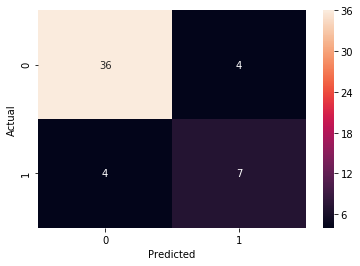

In [411]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

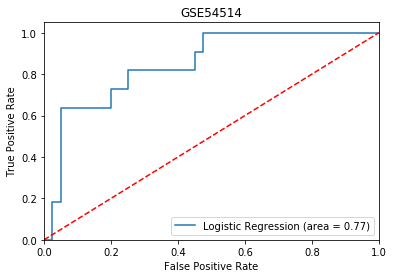

In [413]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE54514')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [414]:
gse63990 = pd.read_csv('../summary_data/expression_data/symb_gse63990.tsv', sep = '\t', encoding="ISO-8859-1")
gse63990.head()

,ID,survivor,DEFA4,CD163,PER1,RGS1,HIF1A,SEPP1,C11orf74,CIT,...,CST3,CBFA2T3,RCBTB2,CX3CR1,CD5,MTMR11,CLEC10A,EMR3,DHRS7B,CEACAM8
0,GSM1561864,0,9.040063,9.213311,none,3.705034,12.220159,none,none,5.630690,...,11.092357,7.607635,9.822003,9.662797,6.786981,7.202566,5.443433,none,8.746915,8.444191
1,GSM1561868,0,6.329605,10.875430,none,3.745710,12.908742,none,none,6.075940,...,11.427507,7.256875,9.992983,11.264253,6.644409,8.255835,6.752779,none,8.599961,8.818918
2,GSM1561869,0,8.552495,12.256743,none,3.788301,12.353026,none,none,5.967595,...,11.840552,6.718579,10.237344,10.221522,6.345829,7.628293,6.584455,none,8.564067,10.333119
3,GSM1561871,0,7.038598,9.036980,none,3.940479,11.273639,none,none,6.030815,...,10.354816,8.050349,9.466296,10.510672,7.722914,6.711019,5.858341,none,8.117050,9.615388
4,GSM1561872,0,5.509972,10.468945,none,3.803766,12.294097,none,none,6.187876,...,11.173292,7.946358,9.934586,11.574578,7.097569,8.170062,6.407922,none,8.223902,5.911354


In [415]:
X = gse63990[['RGS1','CFD','DDIT4','IFI27','IL1R2',
                'MAFF','OCLN','AIM2','APH1A','CCR2','EIF5A',
               'GSTM1','NT5E','RAB40B','VNN3']]
y = gse63990['survivor']

In [446]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [447]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [448]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.50      0.67         2

    accuracy                           0.95        21
   macro avg       0.97      0.75      0.82        21
weighted avg       0.95      0.95      0.95        21



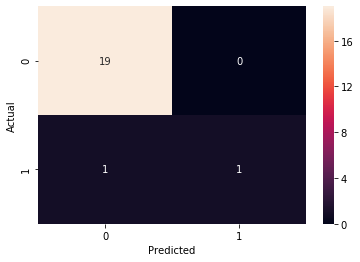

In [449]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

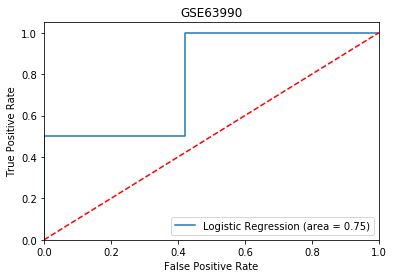

In [452]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE63990')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [453]:
gse66890 = pd.read_csv('../summary_data/expression_data/symb_gse66890.tsv', sep = '\t', encoding="ISO-8859-1")
gse66890.head()

,ID,survivor,DEFA4,CD163,PER1,RGS1,HIF1A,SEPP1,C11orf74,CIT,...,CST3,CBFA2T3,RCBTB2,CX3CR1,CD5,MTMR11,CLEC10A,EMR3,DHRS7B,CEACAM8
0,GSM1633778,1,7.039858,7.077832,6.071056,4.350045,9.794215,none,none,5.372993,...,8.656699,7.144242,7.856828,7.751036,6.873610,6.453090,5.919533,none,6.912419,6.997732
1,GSM1633780,1,7.371770,8.058715,6.201991,4.581427,9.516381,none,none,5.288966,...,8.703923,6.640726,7.132981,6.622905,6.482016,6.307831,5.607171,none,6.392712,7.489678
2,GSM1633781,1,10.603561,8.146085,6.306313,4.088722,9.577282,none,none,5.329123,...,8.461421,6.667040,8.304852,8.076417,6.738872,6.293269,5.536844,none,6.709960,7.742219
3,GSM1633782,0,8.564759,9.400548,6.475958,4.443354,9.996865,none,none,5.524450,...,8.350917,6.909059,8.494363,6.095450,6.608682,6.513075,6.073497,none,7.440486,7.017384
4,GSM1633783,0,9.536475,8.028676,6.088349,4.146935,9.278947,none,none,5.533523,...,8.674057,6.933557,8.629136,7.742155,6.887240,6.582791,5.773218,none,7.221320,8.634133


In [454]:
X = gse66890[['RGS1','CFD','DDIT4','IFI27','IL1R2',
                'MAFF','OCLN','AIM2','APH1A','CCR2','EIF5A',
               'GSTM1','NT5E','RAB40B','VNN3']]
y = gse66890['survivor']

In [483]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)
#print(X_train)

In [484]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [485]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        21
           1       0.67      0.25      0.36         8

    accuracy                           0.76        29
   macro avg       0.72      0.60      0.61        29
weighted avg       0.74      0.76      0.72        29



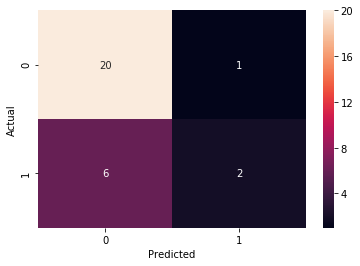

In [486]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

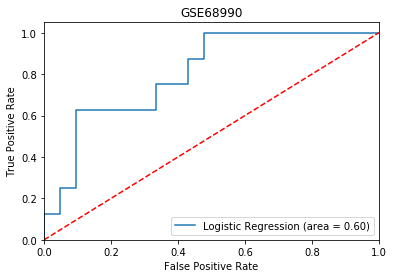

In [488]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE68990')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# Split cohorts (gene)

In [157]:
combined = pd.read_csv('../summary_data/expression_data/symb_all.tsv', sep = '\t', encoding="ISO-8859-1")
combined.head()

,ID,accession,use,survivor,DEFA4,CD163,HIF1A,CFD,DDIT4,IFI27,...,NDUFV2,PSMA6,CKS2,MKI67,PLK1,OR52R1,GSTM1,HIST1H3H,NT5E,EMR3
0,X104,EMEXP3567,discovery,0,4.224372,7.257031,6.854448,5.757022,4.661095,6.318671,...,none,8.277262982,3.472761398,2.662082808,3.058862324,none,none,none,2.40926201,none
1,X105,EMEXP3567,discovery,0,4.696792,6.180262,7.699910,6.341545,5.614675,8.495863,...,none,7.887741342,3.943322796,2.810743297,2.992819341,none,none,none,2.040476674,none
2,X109,EMEXP3567,discovery,0,8.121342,5.256019,6.572749,6.760824,4.726669,5.572711,...,none,7.599235232,3.424484833,2.673759558,3.350762034,none,none,none,2.389437352,none
3,X115,EMEXP3567,discovery,1,4.446170,7.003478,7.243289,6.515147,4.856694,9.391985,...,none,8.677401899,4.294132335,2.414372131,3.080485998,none,none,none,2.586777607,none
4,X121,EMEXP3567,discovery,1,6.204941,8.406683,6.765696,5.821510,4.326144,4.618913,...,none,8.085811291,2.539612367,2.593720456,3.111325772,none,none,none,1.86730537,none


In [158]:
variable = ["CFD","DDIT4","IFI27","IL1R2",
            "MAFF",
            "AIM2","APH1A",
            "CCR2","EIF5A","RAB40B","VNN3"]
# (IL8,  OCLN, RGS1) 
#    ( GSTM1, HIST1H3H, NT5E, )

In [184]:
X_train = combined[(combined.use=="discovery") | (combined.accession!="EMEXP3567")][variable]
X_test = combined[combined.accession=="EMEXP3567"][variable]
y_train = combined[(combined.use=="discovery") | (combined.accession!="EMEXP3567")]["survivor"]
y_test = combined[combined.accession=="EMEXP3567"]["survivor"]


In [185]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


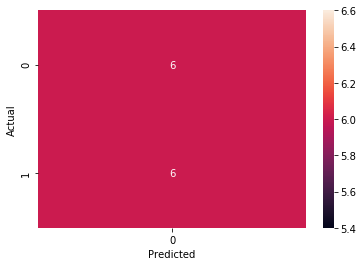

In [187]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

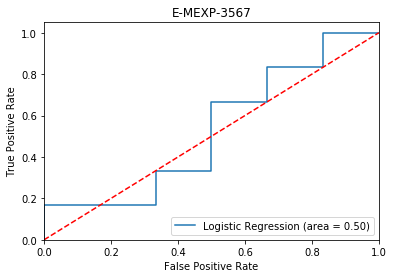

In [188]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('E-MEXP-3567')
plt.legend(loc="lower right")
plt.savefig('../figures/log_roc_EMEXP3567')
plt.show()

In [179]:
X_test = combined[combined.accession=="E-MTAB-4421"][variable]
X_train = combined[combined.use=="discovery"][variable]
y_test = combined[combined.accession=="E-MTAB-4421"]["survivor"]
y_train = combined[combined.use=="discovery"]["survivor"]

In [180]:
logistic_regression= LogisticRegression(penalty='l2',solver='liblinear')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        13
           1       0.00      0.00      0.00         6

    accuracy                           0.68        19
   macro avg       0.34      0.50      0.41        19
weighted avg       0.47      0.68      0.56        19



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


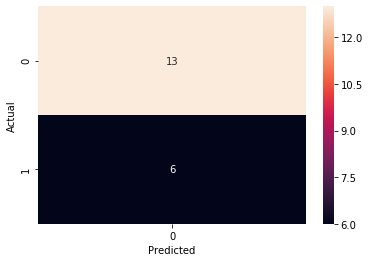

In [182]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

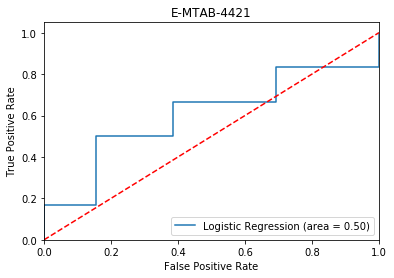

In [183]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('E-MTAB-4421')
plt.legend(loc="lower right")
plt.savefig('../figures/log_roc_EMTAB4421')
plt.show()

In [189]:
X_test = combined[combined.accession=="GSE10474"][variable]
X_train = combined[(combined.use=="discovery")|(combined.accession!="GSE10474")][variable]
y_test = combined[combined.accession=="GSE10474"]["survivor"]
y_train = combined[(combined.use=="discovery")|(combined.accession!="GSE10474")]["survivor"]

In [201]:
logistic_regression= LogisticRegression(penalty='l2',solver='newton-cg')
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        22
           1       0.00      0.00      0.00        11

    accuracy                           0.67        33
   macro avg       0.33      0.50      0.40        33
weighted avg       0.44      0.67      0.53        33



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


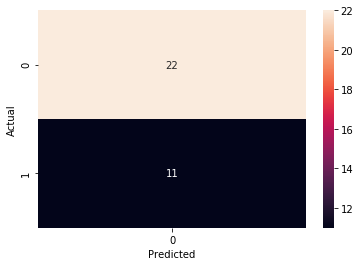

In [203]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

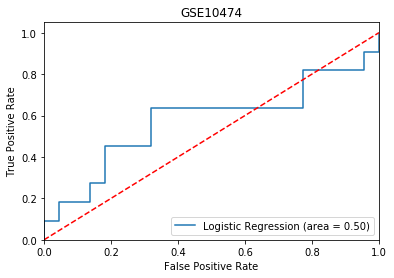

In [204]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE10474')
plt.legend(loc="lower right")
plt.savefig('../figures/log_roc_gse10474')
plt.show()

In [205]:
X_test = combined[combined.accession=="GSE21802"][variable]
X_train = combined[combined.use=="discovery"][variable]
y_test = combined[combined.accession=="GSE21802"]["survivor"]
y_train = combined[combined.use=="discovery"]["survivor"]

In [206]:
logistic_regression= LogisticRegression(penalty="l2",solver="liblinear")
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [207]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.00      0.00      0.00         4

    accuracy                           0.55        11
   macro avg       0.30      0.43      0.35        11
weighted avg       0.38      0.55      0.45        11



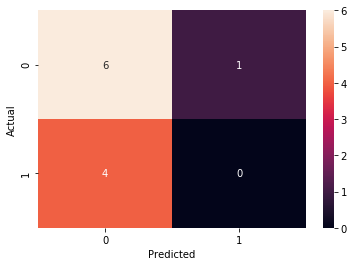

In [208]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

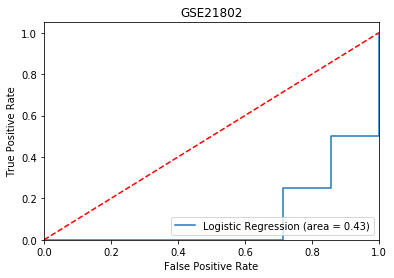

In [209]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE21802')
plt.legend(loc="lower right")
plt.savefig('../figures/log_roc_gse21802')
plt.show()

In [210]:
X_test = combined[combined.accession=="GSE27131"][variable]
X_train = combined[(combined.use=="discovery")|(combined.accession!="GSE27131")][variable]
y_test = combined[combined.accession=="GSE27131"]["survivor"]
y_train = combined[(combined.use=="discovery")|(combined.accession!="GSE27131")]["survivor"]

In [211]:
logistic_regression= LogisticRegression(penalty="l2",solver="liblinear")
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [212]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.00      0.00      0.00         4

    accuracy                           0.71        14
   macro avg       0.36      0.50      0.42        14
weighted avg       0.51      0.71      0.60        14



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


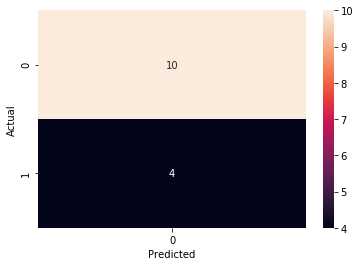

In [213]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

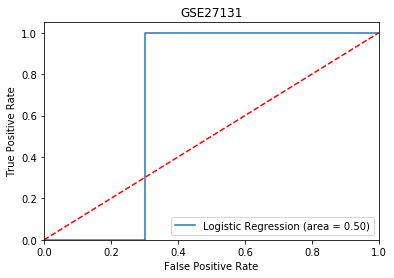

In [214]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE27131')
plt.legend(loc="lower right")
plt.savefig('../figures/log_roc_gse27131')
plt.show()

In [215]:
X_test = combined[combined.accession=="GSE33341"][variable]
X_train = combined[combined.use=="discovery"][variable]
y_test = combined[combined.accession=="GSE33341"]["survivor"]
y_train = combined[combined.use=="discovery"]["survivor"]

In [216]:
logistic_regression= LogisticRegression(penalty="l2",solver="liblinear")
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [217]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       0.00      0.00      0.00         2

    accuracy                           0.96        51
   macro avg       0.48      0.50      0.49        51
weighted avg       0.92      0.96      0.94        51



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


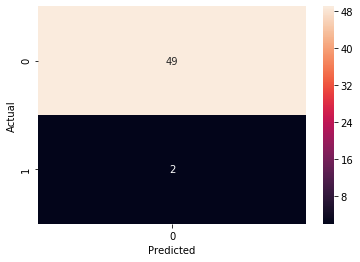

In [218]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

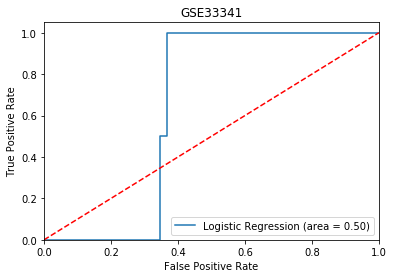

In [219]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE33341')
plt.legend(loc="lower right")
plt.savefig('../figures/log_roc_gse33341')
plt.show()

In [220]:
X_test = combined[combined.accession=="GSE40586"][variable]
X_train = combined[(combined.use=="discovery")|(combined.accession!="GSE40586")][variable]
y_test = combined[combined.accession=="GSE40586"]["survivor"]
y_train = combined[(combined.use=="discovery")|(combined.accession!="GSE40586")]["survivor"]

In [221]:
logistic_regression= LogisticRegression(penalty="l2",solver="liblinear")
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [222]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.00      0.00      0.00         2

    accuracy                           0.90        21
   macro avg       0.45      0.50      0.48        21
weighted avg       0.82      0.90      0.86        21



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


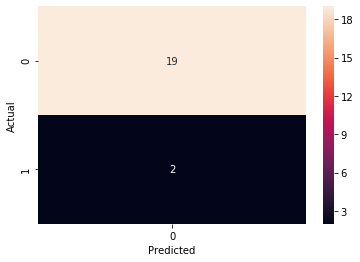

In [223]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

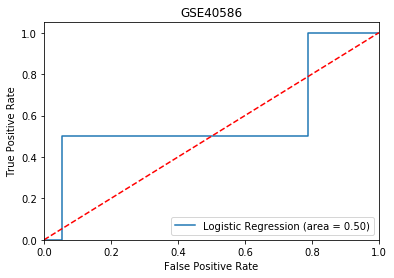

In [224]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE40586')
plt.legend(loc="lower right")
plt.savefig('../figures/log_roc_gse40586')
plt.show()

In [225]:
X_test = combined[combined.accession=="GSE54514"][variable]
X_train = combined[combined.use=="discovery"][variable]
y_test = combined[combined.accession=="GSE54514"]["survivor"]
y_train = combined[combined.use=="discovery"]["survivor"]

In [227]:
logistic_regression= LogisticRegression(penalty="l2",solver="liblinear")
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [228]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84        96
           1       0.00      0.00      0.00        31

    accuracy                           0.72       127
   macro avg       0.37      0.48      0.42       127
weighted avg       0.57      0.72      0.64       127



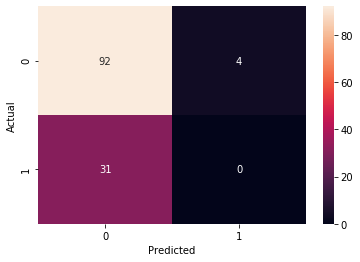

In [229]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

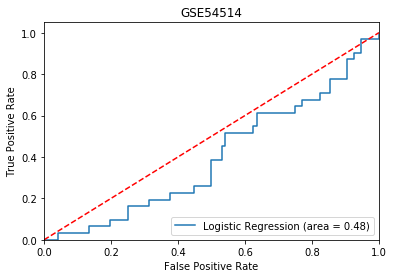

In [230]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE54514')
plt.legend(loc="lower right")
plt.savefig('../figures/log_roc_gse54514')
plt.show()

In [231]:
X_test = combined[combined.accession=="GSE63042"][variable]
X_train = combined[(combined.use=="discovery")|(combined.accession!="GSE63042")][variable]
y_test = combined[combined.accession=="GSE63042"]["survivor"]
y_train = combined[(combined.use=="discovery")|(combined.accession!="GSE63042")]["survivor"]

In [232]:
logistic_regression= LogisticRegression(penalty="l2",solver="liblinear")
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [233]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       100
           1       0.50      0.04      0.07        28

    accuracy                           0.78       128
   macro avg       0.64      0.51      0.47       128
weighted avg       0.72      0.78      0.70       128



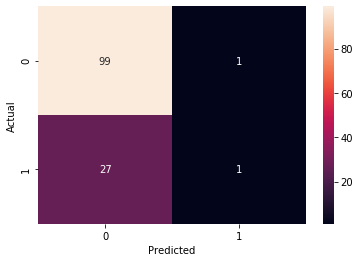

In [234]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

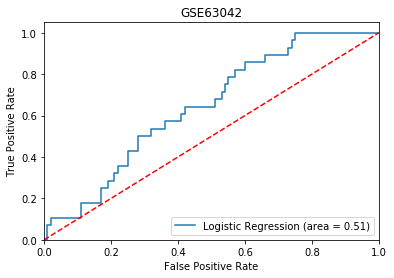

In [235]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE63042')
plt.legend(loc="lower right")
plt.savefig('../figures/log_roc_gse63042')
plt.show()

In [236]:
X_test = combined[combined.accession=="GSE63990"][variable]
X_train = combined[combined.use=="discovery"][variable]
y_test = combined[combined.accession=="GSE63990"]["survivor"]
y_train = combined[combined.use=="discovery"]["survivor"]

In [241]:
logistic_regression= LogisticRegression(penalty="l1",solver="liblinear")
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [242]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        64
           1       0.00      0.00      0.00         6

    accuracy                           0.91        70
   macro avg       0.46      0.50      0.48        70
weighted avg       0.84      0.91      0.87        70



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


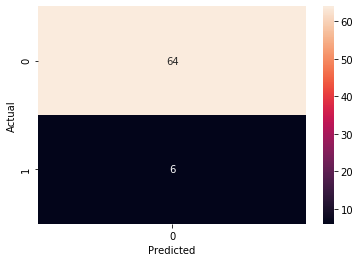

In [243]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

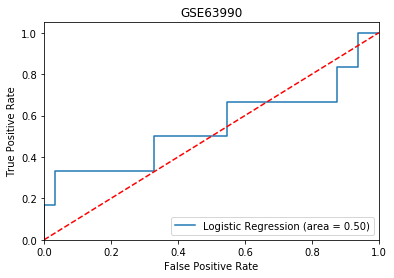

In [244]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE63990')
plt.legend(loc="lower right")
plt.savefig('../figures/log_roc_gse63990')
plt.show()

In [245]:
X_test = combined[combined.accession=="GSE66890"][variable]
X_train = combined[(combined.use=="discovery")|(combined.accession!="GSE66890")][variable]
y_test = combined[combined.accession=="GSE66890"]["survivor"]
y_train = combined[(combined.use=="discovery")|(combined.accession!="GSE66890")]["survivor"]

In [246]:
logistic_regression= LogisticRegression(penalty="l2",solver="liblinear")
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

In [247]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        43
           1       0.00      0.00      0.00        14

    accuracy                           0.75        57
   macro avg       0.38      0.50      0.43        57
weighted avg       0.57      0.75      0.65        57



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


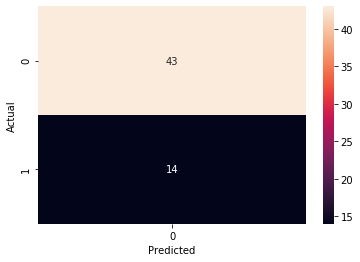

In [248]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

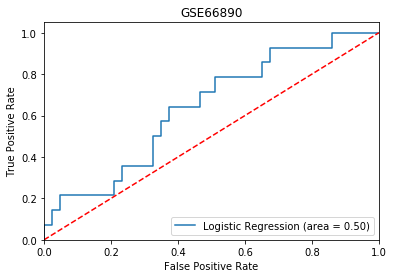

In [249]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GSE66890')
plt.legend(loc="lower right")
plt.savefig('../figures/log_roc_gse66890')
plt.show()

In [150]:
logistic_regression.coef_

array([[-2.62093323e-01, -4.41346957e-01,  1.87158054e-01,
        -6.42362114e-01, -2.56208499e-01,  3.72169967e-01,
        -4.47045029e-02,  1.58009766e-01,  1.66174743e-01,
         1.22183819e+00,  7.55522733e-01,  6.39243763e-01,
        -1.20637654e-02,  1.86317637e-01,  9.74214532e-02,
         4.10412705e-01,  1.50883733e-01, -5.25719800e-01,
         4.51473992e-01, -7.74659244e-01, -1.23303059e-01,
         5.30819756e-04,  4.30235461e-02,  3.50743557e-01,
        -5.16577480e-01,  1.22732858e-01,  4.75798400e-01,
         1.73440429e-01,  2.28548379e-01,  8.56216075e-02,
        -4.41506784e-01, -7.03633631e-02,  2.36495990e-01,
        -5.93587675e-01, -5.56772350e-01, -2.82941542e-01,
         2.74233200e-01,  3.27820960e-01, -5.88182827e-01,
        -6.28072339e-01]])

In [151]:
logistic_regression.intercept_

array([-0.04784919])

In [147]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.625
